In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re    #regular expression
from nltk.stem import WordNetLemmatizer

In [ ]:
df_test=pd.read_csv('/content/SMS_test (2).csv',encoding="ISO-8859-1")
df_train=pd.read_csv('/content/SMS_train (1).csv',encoding="ISO-8859-1")

In [ ]:
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df=pd.concat([df_train,df_test],axis=0)

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.isna().sum()

Message_body    0
Label           0
dtype: int64

In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [ ]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

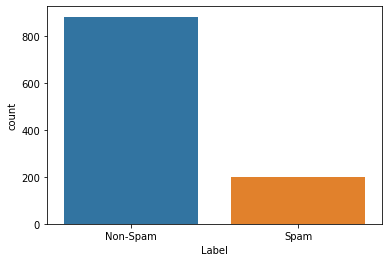

In [ ]:
sns.countplot(x='Label',data=df)

In [ ]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})

In [ ]:
msg=df.Message_body
msg

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [ ]:
msg=msg.str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-22-43a91d22a744>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+',' ')


In [ ]:
from nltk.stem import SnowballStemmer
nltk.download('punkt')
stemmer=SnowballStemmer('english')
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:[stemmer.stem(i.lower())for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
msg

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                rofl it true to it name
1      the guy did some bitch but i act like i d be i...
2         piti was in mood for that so ani other suggest
3                          will b go to esplanad fr home
4      this is the 2nd time we have tri 2 contact u u...
                             ...                        
120    7 wonder in my world 7th you 6th ur style 5th ...
121       tri to do someth dear you read someth for exam
122    sun ah thk mayb can if dun have anythin on thk...
123    symptom when u are in love 1 u like listen son...
124        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msg

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                  b go esplanad fr home
4      2nd time tri 2 contact u u 750 pound prize 2 c...
                             ...                        
120    7 wonder world 7th 6th ur style 5th ur smile 4...
121                     tri someth dear read someth exam
122    sun ah thk mayb dun anythin thk book e lesson ...
123    symptom u love 1 u like listen song 2 u get st...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [ ]:
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:' '.join(x)) #to remove words of length less than 3
msg

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                          esplanad home
4      2nd time tri contact 750 pound prize claim eas...
                             ...                        
120    wonder world 7th 6th style 5th smile 4th perso...
121                     tri someth dear read someth exam
122    sun thk mayb dun anythin thk book lesson pilat...
123    symptom love like listen song get stop see nam...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_vec=vec.fit_transform(msg)

In [ ]:
print(data_vec)

  (0, 1749)	0.5086856793431559
  (0, 2611)	0.5352804139572925
  (0, 2151)	0.6743246681420617
  (1, 1117)	0.1977601804079742
  (1, 1162)	0.32809784984076795
  (1, 2748)	0.22799692523276513
  (1, 1781)	0.26514476216742267
  (1, 966)	0.30392006451010634
  (1, 2337)	0.2751324774651613
  (1, 616)	0.2751324774651613
  (1, 1388)	0.3187189191538061
  (1, 1530)	0.2174075457753962
  (1, 332)	0.35437558793533497
  (1, 541)	0.3752334020731641
  (1, 1232)	0.26826339572857744
  (2, 2436)	0.5165656915002457
  (2, 400)	0.36716239650585775
  (2, 1706)	0.5469696796701571
  (2, 1932)	0.5469696796701571
  (3, 1305)	0.5461172911588754
  (3, 993)	0.8377087228251189
  (4, 2065)	0.235533135363796
  (4, 1758)	0.2730067862368853
  (4, 1672)	0.2433372454072742
  (4, 1904)	0.23925757899516012
  :	:
  (1079, 1855)	0.2706898396742334
  (1079, 1722)	0.2706898396742334
  (1079, 2442)	0.26153957460502464
  (1079, 1519)	0.24774213284441401
  (1079, 562)	0.2374366876682329
  (1079, 2532)	0.49548426568882803
  (1079, 164

In [ ]:
data_vec.shape

(1082, 2861)

In [ ]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.30,random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(757, 2861) (757,) (325, 2861) (325,)


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes  import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
svm_model=SVC()
nb_model=MultinomialNB()
db_model=DecisionTreeClassifier()
rb_model=RandomForestClassifier()

lsb_model=[svm_model,nb_model,db_model,rb_model]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
for i in lsb_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("***********************************************************")
  print(classification_report(y_test,y_pred))
  print("******************************************")

SVC()
***********************************************************
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       269
           1       0.97      0.61      0.75        56

    accuracy                           0.93       325
   macro avg       0.95      0.80      0.85       325
weighted avg       0.93      0.93      0.92       325

******************************************
MultinomialNB()
***********************************************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       269
           1       1.00      0.62      0.77        56

    accuracy                           0.94       325
   macro avg       0.96      0.81      0.87       325
weighted avg       0.94      0.94      0.93       325

******************************************
DecisionTreeClassifier()
***********************************************************
              precision    recall